In [1]:
%matplotlib inline
# Dependencies and Setup
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float, Date, Text
from sqlalchemy.ext.declarative import declarative_base
import matplotlib.dates as md
Base = declarative_base() 
from flask import Flask, jsonify
import pymongo
import sqlite3
from datetime import datetime
import matplotlib.style as style

In [2]:
df = pd.read_csv('data/trips_.csv')

In [3]:
df.shape[0]

862249

Between 1/1/17 to 7/31/19, there were 862,249 Citi bike trips

In [4]:
df.columns

Index(['id', 'trip_duration', 'start_time', 'stop_time', 'start_time_24hr',
       'stop_time_24hr', 'start_time_weekday', 'stop_time_weekday',
       'start_time_year', 'stop_time_year', 'start_time_month',
       'stop_time_month', 'start_station_id', 'end_station_id', 'bike_id',
       'user_type', 'birth_year', 'gender', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

In [5]:
#Calculate trip duration in minutes
df['minutes'] = df.trip_duration / 60

In [6]:
# Most Citi bike trips were by Subscribers, which account for 93% of trips for this data set
df['user_type'].value_counts()

Subscriber    803476
Customer       58656
Name: user_type, dtype: int64

C:\Users\dnunez\LearnPython\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\dnunez\LearnPython\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


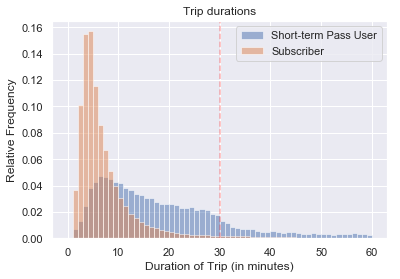

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Plot the distribution of trip duration (in minutes) segmented by user type
df.groupby('user_type')['minutes'].hist(bins = np.arange(61), alpha = 0.5, normed = True)
plt.xlabel('Duration of Trip (in minutes)')
plt.ylabel('Relative Frequency')
plt.title('Trip durations')
plt.legend(['Short-term Pass User', 'Subscriber'])
plt.axvline(30, linestyle="--", color = 'red', alpha = 0.3)

# Save Figure
plt.savefig("img/tripduration.png", bbox_inches="tight", transparent=True)

In this distribution, we visually see that most subscribers use the bike for roughly 10 minutes or less. Conversely, short-term pass users use it for a wider time period. 
Perhaps subscribers are using it for daily commutes where their trip time is roughly 10 minutes or less.

In [8]:
median_duration = df['minutes'].median()
median_duration = str(round(median_duration, 1))
print("Half of all trips lasted less than %s minutes between 1/1/17 to 7/31/19." % median_duration)

Half of all trips lasted less than 5.7 minutes between 1/1/17 to 7/31/19.


In [9]:
mean_duration = df['minutes'].mean()
mean_duration = str(round(mean_duration, 1))
print("The average trip duration in this time period is %s minutes." % mean_duration)

The average trip duration in this time period is 11.9 minutes.


In [10]:
by_date = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_weekday',
                        columns = 'user_type',)

In [11]:
by_date

user_type,Customer,Subscriber
start_time_weekday,,
01-Mon,6024,122754
02-Tue,5218,132437
03-Wed,5804,136596
04-Thu,5227,129168
05-Fri,6240,123552
06-Sat,15048,83144
07-Sun,15095,75825


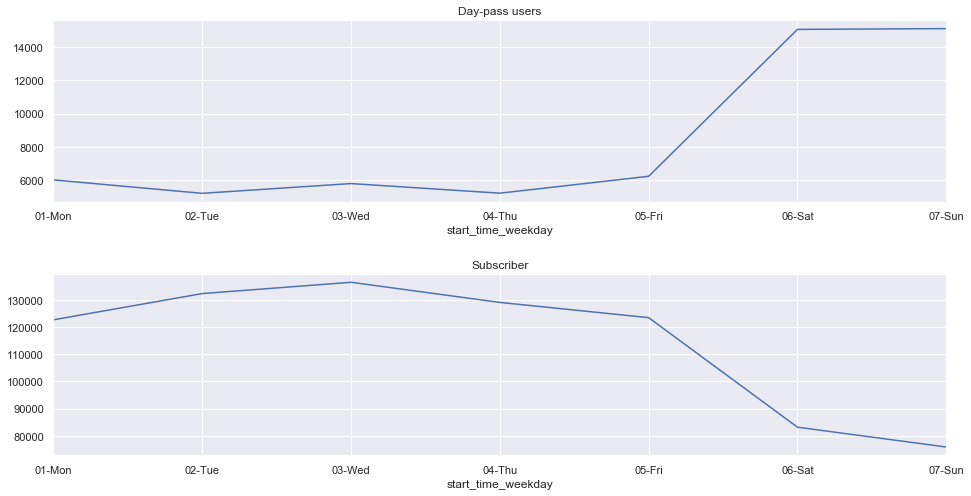

In [12]:
fig,ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace = 0.4)
by_date.iloc[:,0].plot(ax=ax[0], title='Day-pass users');
by_date.iloc[:,1].plot(ax=ax[1], title='Subscriber')

# Save Figure
plt.savefig("img/dailyvssubscribers.png", bbox_inches="tight", transparent=True)

In [13]:
by_weekdate = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_weekday',
                        columns = 'user_type',)

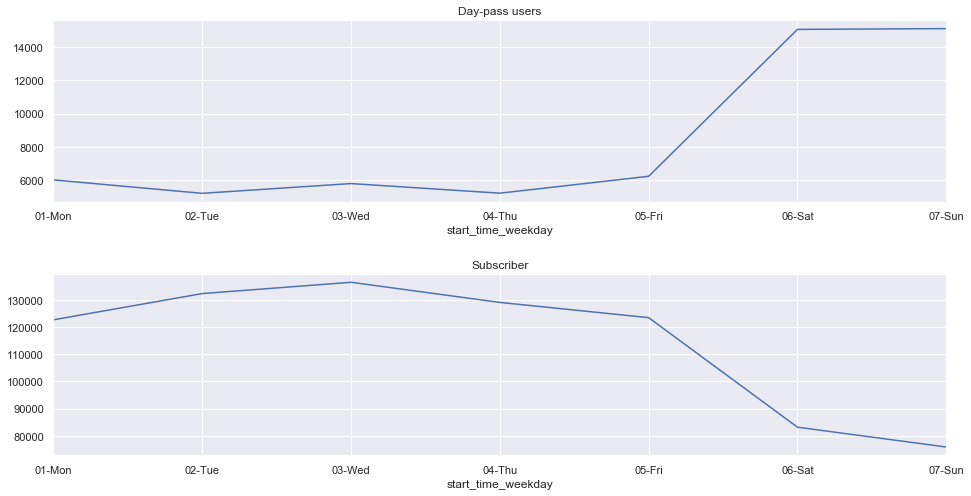

In [14]:
fig,ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace = 0.4)
by_date.iloc[:,0].plot(ax=ax[0], title='Day-pass users');
by_date.iloc[:,1].plot(ax=ax[1], title='Subscriber')

In [15]:
by_weekday = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_weekday',
                        columns = 'user_type',)

In [16]:
by_weekday

user_type,Customer,Subscriber
start_time_weekday,,
01-Mon,6024,122754
02-Tue,5218,132437
03-Wed,5804,136596
04-Thu,5227,129168
05-Fri,6240,123552
06-Sat,15048,83144
07-Sun,15095,75825


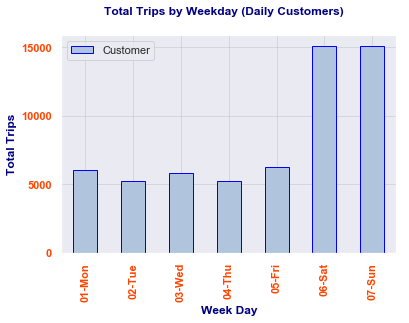

In [17]:
by_weekday.plot.bar(y='Customer', color='lightsteelblue', edgecolor='blue')
# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Total Trips by Weekday (Daily Customers)', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Total Trips", weight='semibold', color='navy')

# Label for y axis
plt.xlabel("Week Day", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("img/Weekday_Trips_DailyCustomers.png", bbox_inches="tight", transparent=True)

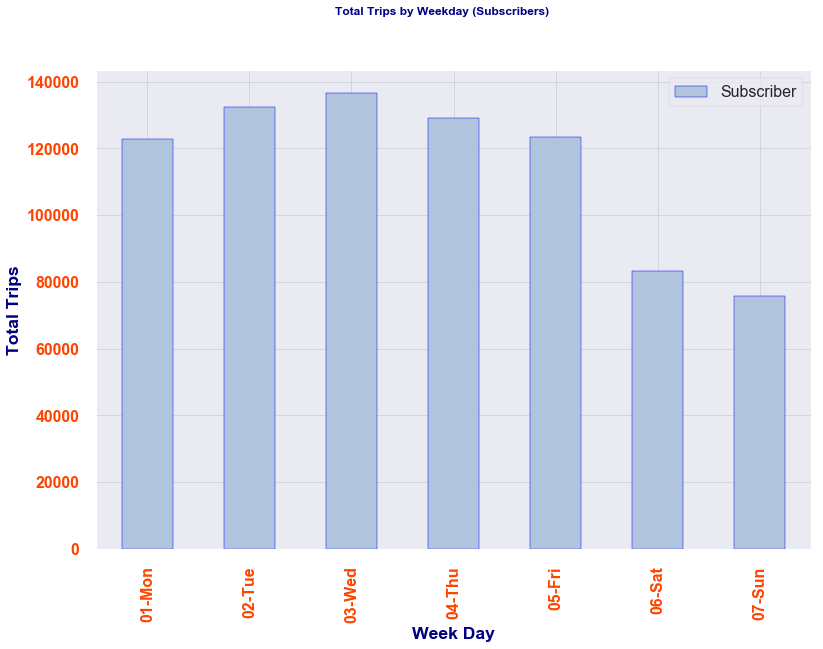

In [18]:
by_weekday.plot.bar(y='Subscriber', color='lightsteelblue', edgecolor='blue')
# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Total Trips by Weekday (Subscribers)', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Total Trips", weight='semibold', color='navy')

# Label for y axis
plt.xlabel("Week Day", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("img/Weekday_Trips_Subscribers.png", bbox_inches="tight", transparent=True)

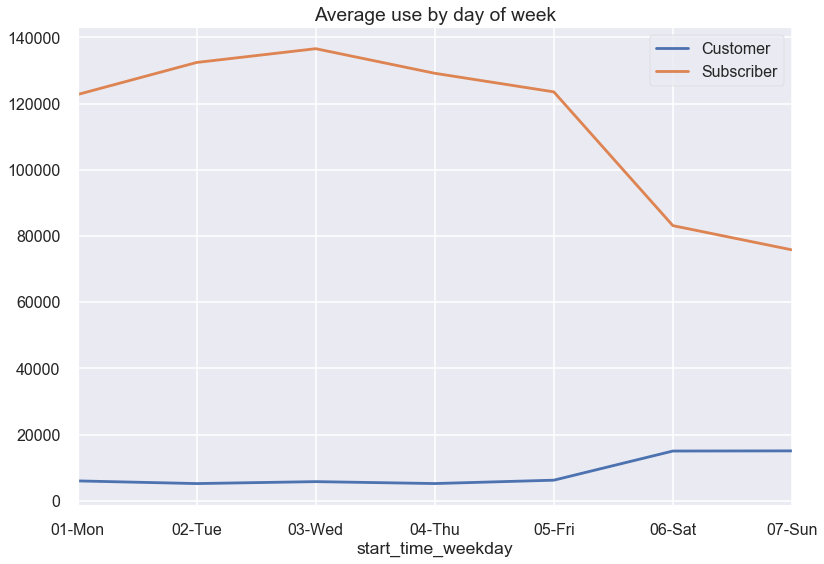

In [19]:
by_weekday.columns.name = None
by_weekday.plot(title = 'Average use by day of week')

# Save Figure
plt.savefig("img/avg_duration_weekday.png", bbox_inches="tight", transparent=True)

In [20]:
by_month = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_month',
                        columns = 'user_type',)

In [21]:
by_month

user_type,Customer,Subscriber
start_time_month,,
01-Jan,675,44586
02-Feb,1083,46546
03-Mar,1705,51177
04-Apr,6420,71456
05-May,7870,88687
06-Jun,10934,101493
07-Jul,12673,106914
08-Aug,5608,74160
09-Sep,5577,65955


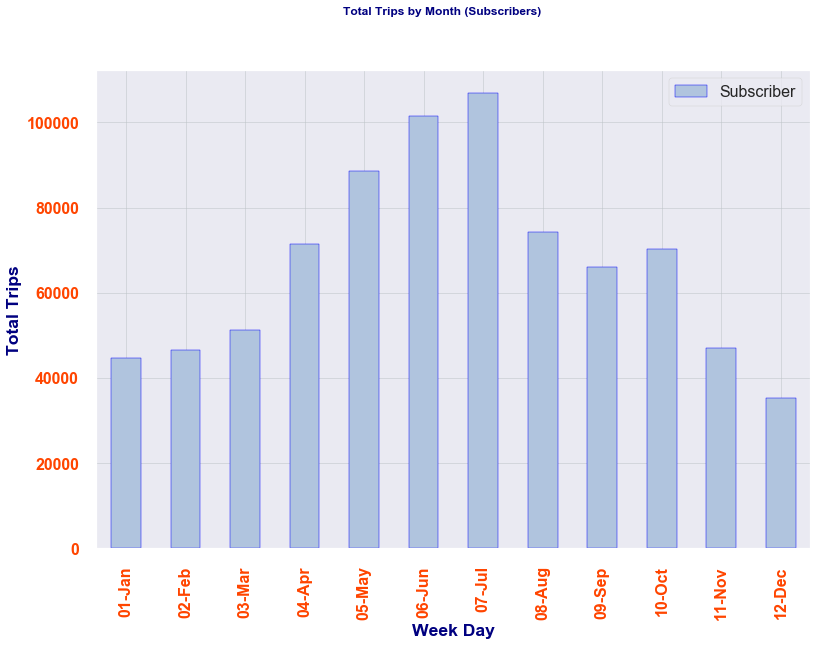

In [22]:
by_month.plot.bar(y='Subscriber', color='lightsteelblue', edgecolor='blue')# Rotate ticks 90 degrees

plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Total Trips by Month (Subscribers)', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Total Trips", weight='semibold', color='navy')

# Label for y axis
plt.xlabel("Week Day", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("img/Month_Trips_Subscribers.png", bbox_inches="tight", transparent=True)

# Save Figure
plt.savefig("img/trip_month_subscribers.png", bbox_inches="tight", transparent=True)

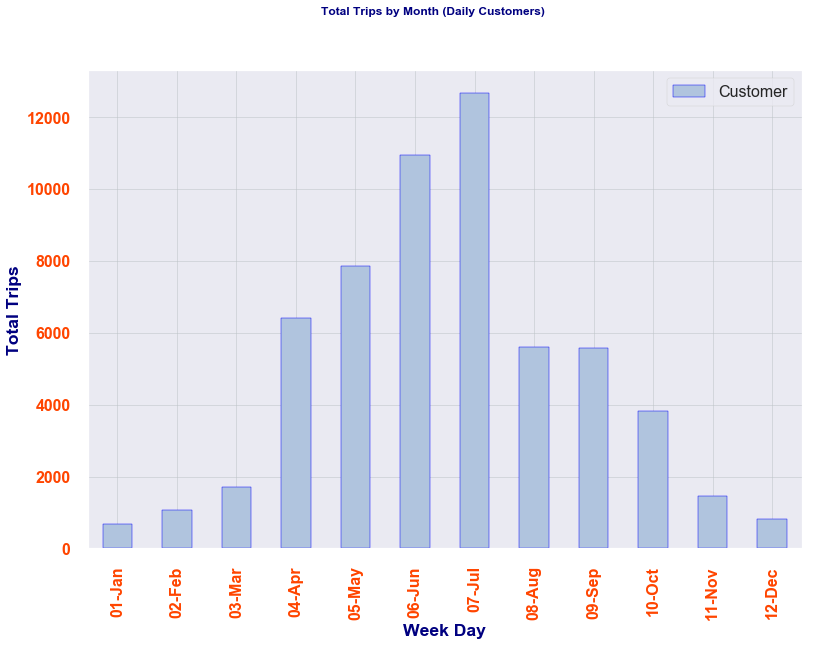

In [23]:
by_month.plot.bar(y='Customer', color='lightsteelblue', edgecolor='blue')

plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Total Trips by Month (Daily Customers)', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Total Trips", weight='semibold', color='navy')

# Label for y axis
plt.xlabel("Week Day", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("img/Month_Trips_Customers.png", bbox_inches="tight", transparent=True)

# Save Figure
plt.savefig("img/trip_month_customers.png", bbox_inches="tight", transparent=True)

### For trip duration by year, 2019 is NOT a full year

In [24]:
by_year = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_year',
                        columns = 'user_type',)

In [25]:
by_year

user_type,Customer,Subscriber
start_time_year,,
2017,15926,278100
2018,22167,331725
2019,20563,193651


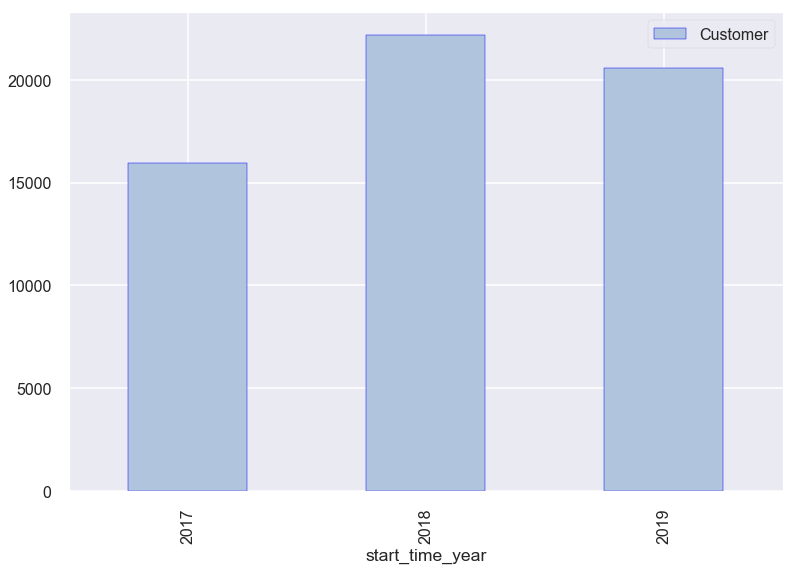

In [26]:
by_year.plot.bar(y='Customer', color='lightsteelblue', edgecolor='blue')
# Save Figure
plt.savefig("img/by_year_customer.png", bbox_inches="tight", transparent=True)

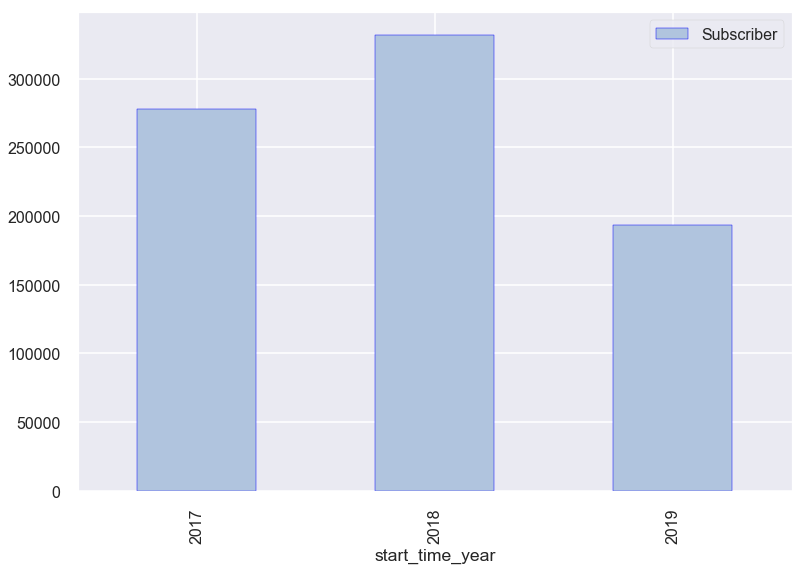

In [27]:
by_year.plot.bar(y='Subscriber', color='lightsteelblue', edgecolor='blue')
# Save Figure
plt.savefig("img/by_year_subscriber.png", bbox_inches="tight", transparent=True)

In [28]:
df["start_time_24hr"] = pd.to_datetime(df["start_time_24hr"],errors="coerce").dt.strftime("%H:%M")

df.sort_values(by=['start_time_24hr'], ascending=True)

,id,trip_duration,start_time,stop_time,start_time_24hr,stop_time_24hr,start_time_weekday,stop_time_weekday,start_time_year,stop_time_year,...,start_station_id,end_station_id,bike_id,user_type,birth_year,gender,Unnamed: 18,Unnamed: 19,Unnamed: 20,minutes
135702,135703,235,8/19/2017 0:00,8/19/2017 0:04,00:00,0:04,06-Sat,06-Sat,2017,2017,...,32,84,26230,Subscriber,1980.0,1,NaN,NaN,NaN,3.916667
72457,72458,1468,00:46.6,25:15.1,00:00,0:25,06-Sat,06-Sat,2018,2018,...,188,188,26195,Customer,1969.0,0,NaN,NaN,NaN,24.466667
135733,135734,295,8/19/2017 0:00,8/19/2017 0:05,00:00,0:05,06-Sat,06-Sat,2017,2017,...,32,56,29442,Subscriber,1980.0,2,NaN,NaN,NaN,4.916667
652684,652685,101,00:28.5,02:09.7,00:00,0:02,06-Sat,06-Sat,2018,2018,...,77,56,26243,Subscriber,1984.0,1,NaN,NaN,NaN,1.683333
135701,135702,344,8/19/2017 0:00,8/19/2017 0:06,00:00,0:06,06-Sat,06-Sat,2017,2017,...,32,56,29673,Subscriber,1982.0,1,NaN,NaN,NaN,5.733333
292475,292476,462,11/18/2017 0:00,11/18/2017 0:07,00:00,0:07,06-Sat,06-Sat,2017,2017,...,27,179,26252,Subscriber,1992.0,1,NaN,NaN,NaN,7.700000
785145,785146,150,00:23.9,02:54.7,00:00,0:02,04-Thu,04-Thu,2019,2019,...,145,65,26165,Subscriber,1978.0,1,NaN,NaN,NaN,2.500000
633776,633777,440,5/12/2017 0:00,5/12/2017 0:07,00:00,0:07,05-Fri,05-Fri,2017,2017,...,98,98,29269,Subscriber,1981.0,1,NaN,NaN,NaN,7.333333
189931,189932,211,00:50.2,04:22.0,00:00,0:04,07-Sun,07-Sun,2019,2019,...,32,145,29545,Subscriber,1988.0,1,NaN,NaN,NaN,3.516667
566472,566473,114,6/5/2017 0:00,6/5/2017 0:02,00:00,0:02,01-Mon,01-Mon,2017,2017,...,64,76,26176,Subscriber,1985.0,1,NaN,NaN,NaN,1.900000


In [29]:
by_time = df.pivot_table('trip_duration', aggfunc='count', 
                         index = 'start_time_24hr',
                        columns = 'user_type',)

by_time

user_type,Customer,Subscriber
start_time_24hr,,
00:00,9.0,119.0
00:01,6.0,137.0
00:02,17.0,153.0
00:03,23.0,201.0
00:04,11.0,162.0
00:05,13.0,129.0
00:06,14.0,151.0
00:07,8.0,132.0
00:08,14.0,133.0


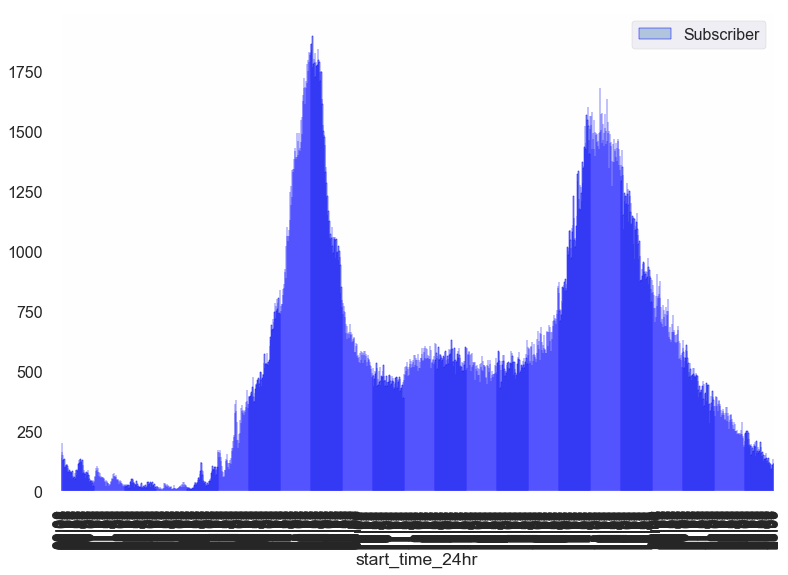

In [30]:
by_time.plot.bar(y='Subscriber', color='lightsteelblue', edgecolor='blue')

# Save Figure
plt.savefig("img/by_time.png", bbox_inches="tight", transparent=True)